<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/06_Simulando_Carteiras_de_A%C3%A7%C3%B5es_Aleat%C3%B3rias_Python_para_Investimentos_com_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/G2Tr2dcjR3U

# 1. Importando Bibliotecas


In [0]:
# Configurando Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

# 2. Obtendo e tratando os dados

In [3]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  73 of 73 completed
[*********************100%***********************]  1 of 1 completed


In [0]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [5]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SBSP3.SA,SMLS3.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-30,17.997313,34.000000,33.391548,47.181198,26.429434,29.759251,25.204918,30.666286,22.926079,31.049999,46.470974,11.502794,37.806801,10.851621,7.378108,13.994849,9.659197,20.935730,45.867447,13.572260,56.218761,16.277128,8.11,41.701786,32.687599,34.650002,19.639999,16.995586,16.230001,20.089945,13.938801,34.999268,6.678819,22.780001,30.054893,31.289457,27.125053,38.034889,30.564280,11.317566,32.615788,19.321003,15.439602,41.868736,23.741644,7.32,13.029781,23.578814,28.656303,26.255447,16.708485,68.642746,18.100000,34.131905,45.462704,48.662785,40.730000,11.317073,44.128220,20.494844,8.589001,48.806709,43.657127,4.10,18.341017,26.677122
2019-05-02,17.490623,34.599998,32.858444,47.285667,26.531750,29.775906,25.347620,29.671921,23.042156,30.760000,44.817551,11.411739,36.373600,10.981580,7.195577,14.004344,9.461060,21.133236,45.740231,12.965523,56.799229,15.636298,8.05,40.680096,32.257702,34.130001,19.709999,16.985878,16.219999,19.518713,13.791040,35.298233,6.590423,22.559999,30.144283,30.917080,27.047775,37.148270,31.410606,11.355577,32.832806,19.078846,15.282411,40.829147,23.677095,7.16,12.778344,22.939156,28.225887,25.887426,16.708485,68.603027,17.540001,33.905590,44.824291,48.692577,41.939999,11.181540,43.623085,20.953539,8.409856,47.676651,43.362637,4.14,18.528572,26.549526
2019-05-03,17.461390,36.080002,33.023224,47.561085,27.068270,30.094677,24.999784,30.749474,22.065138,30.719999,44.827274,11.910768,37.678299,11.120822,7.089901,13.738500,9.352084,21.202364,45.189999,14.004511,56.304028,15.361656,8.25,39.902111,32.187801,34.279999,19.510000,17.014999,16.028000,19.983444,14.017608,35.178650,6.718107,23.690001,30.273401,31.113068,27.125053,38.124546,32.582401,11.184531,32.514507,20.056246,15.419892,40.573719,24.361015,7.11,12.984882,23.785471,28.273712,26.003645,16.757055,68.761879,17.650000,33.801937,45.172516,47.808701,41.990002,11.113773,42.087719,20.699791,8.827861,49.098969,43.372082,4.52,18.410118,25.950813
2019-05-06,17.597807,35.000000,32.664593,46.886795,26.189657,29.282909,25.436811,30.132330,22.084486,31.049999,43.932480,11.713038,38.350498,11.408589,7.291646,13.729482,9.262921,20.975231,44.860001,13.945750,55.689983,15.389119,8.54,39.986473,32.607601,34.340000,19.299999,17.053822,15.882000,19.731712,13.869846,34.670403,6.629710,23.299999,30.382656,31.260057,27.395533,37.815723,32.061539,10.870945,31.800755,19.841217,15.302024,40.249519,24.852680,7.00,13.002842,23.696903,28.254581,25.926167,16.553057,68.056992,17.610001,33.293079,44.921017,46.934757,41.330002,11.065369,41.701469,20.748590,8.738288,48.378067,42.984833,4.56,18.123848,25.617104
2019-05-07,17.198299,35.279999,32.625820,47.000763,25.822842,29.098793,24.598429,30.347839,22.858360,31.049999,42.862617,11.392908,36.650398,11.325045,7.205184,13.631483,9.163853,20.540714,44.560001,13.886991,56.056431,15.544749,8.28,39.642654,32.497700,34.049999,19.200001,17.112059,15.920000,19.547760,14.007757,34.301674,6.600245,23.500000,32.528015,30.897482,27.781931,37.666294,32.387100,10.870945,31.443872,19.323196,14.810937,40.504948,23.852070,6.82,13.290197,23.401678,27.948507,25.519405,16.776484,67.540726,17.600000,33.038479,46.526722,44.144096,40.990002,11.104092,40.512756,20.885221,8.419808,48.417038,43.305965,4.72,17.906677,26.156927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [6]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SBSP3.SA,SMLS3.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-02,-0.028154,0.017647,-0.015965,0.002214,0.003871,0.000560,0.005662,-0.032425,0.005063,-0.009340,-0.035580,-0.007916,-0.037909,0.011976,-0.024739,0.000678,-0.020513,0.009434,-0.002774,-0.044704,0.010325,-0.039370,-0.007398,-0.024500,-0.013152,-0.015007,0.003564,-0.000571,-0.000616,-0.028434,-0.010601,0.008542,-0.013235,-0.009658,0.002974,-0.011901,-0.002849,-0.023311,0.027690,0.003359,0.006654,-0.012533,-0.010181,-0.024830,-0.002719,-0.021858,-0.019297,-0.027129,-0.015020,-0.014017,0.000000,-0.000579,-0.030939,-0.006631,-0.014043,0.000612,0.029708,-0.011976,-0.011447,0.022381,-0.020857,-0.023154,-0.006746,0.009756,0.010226,-0.004783
2019-05-03,-0.001671,0.042775,0.005015,0.005825,0.020222,0.010706,-0.013723,0.036316,-0.042401,-0.001300,0.000217,0.043729,0.035869,0.012680,-0.014686,-0.018983,-0.011518,0.003271,-0.012029,0.080135,-0.008718,-0.017564,0.024845,-0.019124,-0.002167,0.004395,-0.010147,0.001714,-0.011837,0.023810,0.016429,-0.003388,0.019374,0.050089,0.004283,0.006339,0.002857,0.026281,0.037306,-0.015063,-0.009695,0.051230,0.008996,-0.006256,0.028885,-0.006983,0.016163,0.036894,0.001694,0.004489,0.002907,0.002316,0.006271,-0.003057,0.007769,-0.018152,0.001192,-0.006061,-0.035196,-0.012110,0.049704,0.029833,0.000218,0.091787,-0.006393,-0.022551
2019-05-06,0.007813,-0.029934,-0.010860,-0.014177,-0.032459,-0.026974,0.017481,-0.020070,0.000877,0.010742,-0.019961,-0.016601,0.017840,0.025876,0.028455,-0.000656,-0.009534,-0.010713,-0.007302,-0.004196,-0.010906,0.001788,0.035152,0.002114,0.013042,0.001750,-0.010764,0.002282,-0.009109,-0.012597,-0.010541,-0.014448,-0.013158,-0.016463,0.003609,0.004724,0.009972,-0.008100,-0.015986,-0.028037,-0.021952,-0.010721,-0.007644,-0.007990,0.020182,-0.015471,0.001383,-0.003724,-0.000677,-0.002980,-0.012174,-0.010251,-0.002266,-0.015054,-0.005568,-0.018280,-0.015718,-0.004355,-0.009177,0.002357,-0.010147,-0.014683,-0.008929,0.008850,-0.015550,-0.012859
2019-05-07,-0.022702,0.008000,-0.001187,0.002431,-0.014006,-0.006288,-0.032959,0.007152,0.035042,0.000000,-0.024352,-0.027331,-0.044331,-0.007323,-0.011858,-0.007138,-0.010695,-0.020716,-0.006687,-0.004213,0.006580,0.010113,-0.030445,-0.008598,-0.003370,-0.008445,-0.005181,0.003415,0.002393,-0.009323,0.009943,-0.010635,-0.004444,0.008584,0.070611,-0.011599,0.014104,-0.003952,0.010154,0.000000,-0.011222,-0.026108,-0.032093,0.006346,-0.040262,-0.025714,0.022099,-0.012458,-0.010833,-0.015689,0.013498,-0.007586,-0.000568,-0.007647,0.035745,-0.059458,-0.008226,0.003499,-0.028505,0.006585,-0.036446,0.000806,0.007471,0.035088,-0.011983,0.021073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,-0.038095,-0.145388,-0.103030,-0.133690,-0.109558,-0.078036,-0.067991,0.009864,-0.074317,-0.049206,-0.085065,-0.123468,-0.056593,-0.080214,-0.042254,-0.111675,-0.059184,-0.029612,-0.053448,-0.056000,-0.1

In [7]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SBSP3.SA,SMLS3.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-05-02,0.971846,1.017647,0.984035,1.002214,1.003871,1.000560,1.005662,0.967575,1.005063,0.990660,0.964420,0.992084,0.962091,1.011976,0.975261,1.000678,0.979487,1.009434,0.997226,0.955296,1.010325,0.960630,0.992602,0.975500,0.986848,0.984993,1.003564,0.999429,0.999384,0.971566,0.989399,1.008542,0.986765,0.990342,1.002974,0.988099,0.997151,0.976689,1.027690,1.003359,1.006654,0.987467,0.989819,0.975170,0.997281,0.978142,0.980703,0.972871,0.984980,0.985983,1.000000,0.999421,0.969061,0.993369,0.985957,1.000612,1.029708,0.988024,0.988553,1.022381,0.979143,0.976846,0.993254,1.009756,1.010226,0.995217
2019-05-03,0.970222,1.061177,0.988970,1.008052,1.024171,1.011271,0.991861,1.002713,0.962447,0.989372,0.964630,1.035467,0.996601,1.024807,0.960938,0.981683,0.968205,1.012736,0.985230,1.031848,1.001517,0.943757,1.017263,0.956844,0.984710,0.989322,0.993381,1.001142,0.987554,0.994699,1.005654,1.005125,1.005882,1.039947,1.007270,0.994363,1.000000,1.002357,1.066029,0.988245,0.996895,1.038054,0.998723,0.969070,1.026088,0.971311,0.996554,1.008765,0.986649,0.990410,1.002907,1.001736,0.975138,0.990333,0.993617,0.982449,1.030935,0.982036,0.953760,1.010000,1.027810,1.005988,0.993471,1.102439,1.003768,0.972774
2019-05-06,0.977802,1.029412,0.978229,0.993760,0.990928,0.983994,1.009200,0.982588,0.963291,1.000000,0.945375,1.018278,1.014381,1.051326,0.988281,0.981038,0.958974,1.001887,0.978036,1.027519,0.990594,0.945444,1.053021,0.958867,0.997553,0.991053,0.982688,1.003426,0.978558,0.982169,0.995053,0.990604,0.992647,1.022827,1.010905,0.999060,1.009972,0.994238,1.048987,0.960537,0.975011,1.026925,0.991089,0.961326,1.046797,0.956284,0.997932,1.005008,0.985981,0.987459,0.990698,0.991467,0.972928,0.975424,0.988085,0.964490,1.014731,0.977759,0.945007,1.012381,1.017381,0.991218,0.984601,1.112195,0.988159,0.960265
2019-05-07,0.955604,1.037647,0.977068,0.996176,0.977049,0.977807,0.975938,0.989616,0.997046,1.000000,0.922352,0.990447,0.969413,1.043627,0.976563,0.974036,0.948718,0.981132,0.971495,1.023189,0.997113,0.955006,1.020962,0.950622,0.994190,0.982684,0.977597,1.006853,0.980899,0.973012,1.004947,0.980068,0.988235,1.031607,1.082287,0.987473,1.024217,0.990309,1.059639,0.960537,0.964069,1.000114,0.959282,0.967427,1.004651,0.931694,1.019986,0.992488,0.975301,0.971966,1.004070,0.983946,0.972376,0.967965,1.023404,0.907143,1.006384,0.981181,0.918069,1.019048,0.980301,0.992016,0.991956,1.151219,0.976319,0.980500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,0.617314,0.411471,1.108065,0.5

# 3. Resultados

In [8]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 10000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

,FLRY3.SA,VALE3.SA,HGTX3.SA,CSAN3.SA,MRVE3.SA,saldo,retorno
Date,,,,,,,
2019-04-30,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2019-05-02,9715.662812,9768.462512,9880.989500,9972.264351,9807.028851,49144.408027,-0.017112
2019-05-03,9946.988095,10059.880951,9943.626477,9852.303034,9965.541258,49768.339815,0.012696
2019-05-06,9821.685674,9912.175543,9990.603905,9780.357016,9979.324755,49484.146893,-0.005710
2019-05-07,9730.121295,9920.160295,9874.726046,9714.951319,10199.862165,49439.821120,-0.000896
...,...,...,...,...,...,...,...
2020-04-24,11503.267329,8965.980079,4244.240990,12239.617242,9977.143637,46930.249276,-0.052421
2020-04-27,11647.617654,9127.843259,4365.687684,12889.315392,10514.374302,48544.838291,0.034404
2020-04-28,11652.595383,9140.136932,4886.629961,13517.211921,11335.570468,50532.144664,0.040938


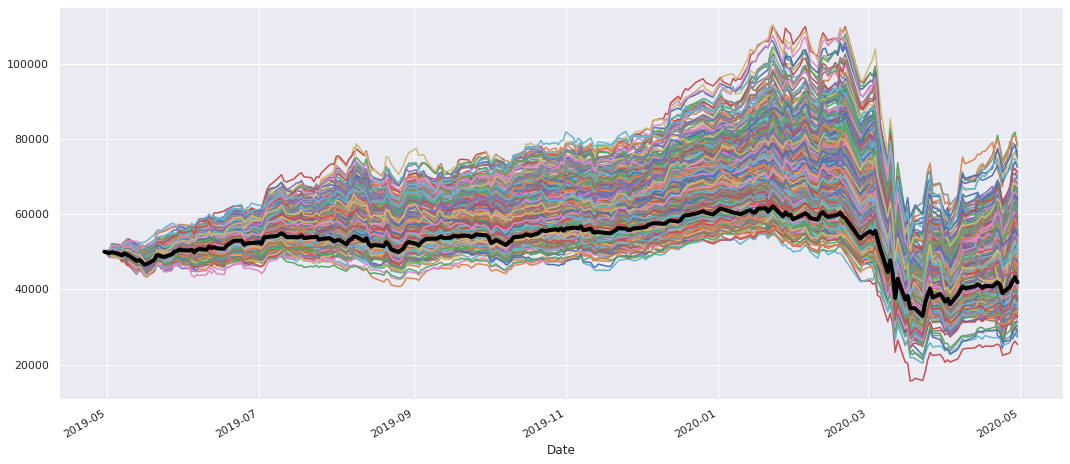

In [9]:
for i in range(500):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=4, color='black')
  